#Stroke Prediction Dataset's EDA

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/code?resource=download

##Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation. 

##Attribute Information
1) id: unique identifier 

2) gender: "Male", "Female" or "Other" 

3) age: age of the patient 

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 

6) ever_married: "No" or "Yes" 

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood 

10) bmi: body mass index 

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Importing Libs & Data

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [4]:
sp_df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv')
sp_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Insights

**Insights**
Data consists of 11 attributes/features, 5 of them are categorical (type object).

In [5]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
sp_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
sp_df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


**Insights**: there are no (redundant id's) people who have a history of strokes before 

In [8]:
sp_df[['id','stroke']].groupby('id').sum()

,stroke
id,
67,0
77,0
84,0
91,0
99,0
...,...
72911,0
72914,0
72915,0


Dropping ID column since we have no use of it/ No added information or value

In [9]:
sp_df.drop(columns=['id'], inplace=True)

**Insights**: How many records are there for each class

In [10]:
sp_df['stroke'].value_counts()
#Classes are imbalanced

0    4861
1     249
Name: stroke, dtype: int64

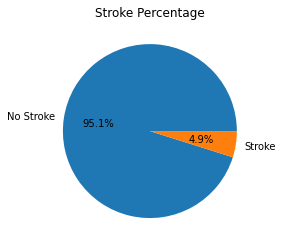

In [11]:
_labels = 'No Stroke', 'Stroke' # 0, 1
plt.pie(sp_df['stroke'].value_counts(), labels = _labels, autopct='%.1f%%')
plt.title('Stroke Percentage')
plt.show()

## Cleaning

Searching for duplicates

In [12]:
sp_df.duplicated().sum()

0

Dropping NA cells as in this study we are not obligated to keep as much records as possible.

In [13]:
pd.DataFrame(sp_df.isna().sum())

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


- We only have missing values in the BMI column, we can either replace the values with the mean value or remove the record.
- We will decide based on how many records are from the lower density class and the importance/correlation of BMI and predicting the class.


In [14]:
pd.DataFrame(sp_df.loc[sp_df['stroke'] == 1].isna().sum())

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,40
smoking_status,0


In [15]:
pd.DataFrame(sp_df.loc[sp_df['stroke'] == 0].isna().sum())

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,161
smoking_status,0


In [16]:
sp_df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


Total Records

- 0 :   4861 total records in class 0.
- 1 :   249 total records in class 1.

Missing BMI records
- 0: 161 total records missing bmi value in class 0.
- 1: 40 total records missing bmi value in class 1.

As it's noted, class stroke=0 (fewer number of records) will loose more records, and BMI column has the lowest correlation with the target class which leads us to replace the missing values with the mean value. (There are much better methods of replacement but this is the easiest and queickest method for such a small project).

In [17]:
sp_df['bmi'].head(5)
#checking how many decimal numbers to round the mean by the same number

0    36.6
1     NaN
2    32.5
3    34.4
4    24.0
Name: bmi, dtype: float64

In [18]:
sp_df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [19]:
sp_df['bmi'].fillna(value = np.round(sp_df['bmi'].mean(), 1), inplace = True)

In [20]:
sp_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
sp_df['bmi'].head(5)

0    36.6
1    28.9
2    32.5
3    34.4
4    24.0
Name: bmi, dtype: float64

### Normalizing and mapping columns, and removing outliers

In [22]:
sp_df[['gender', 'Residence_type', 'ever_married', 'work_type', 'smoking_status']].value_counts() 

gender  Residence_type  ever_married  work_type     smoking_status 
Female  Urban           Yes           Private       never smoked       279
        Rural           Yes           Private       never smoked       268
Male    Urban           No            children      Unknown            172
        Rural           Yes           Private       never smoked       156
                        No            children      Unknown            154
                                                                      ... 
        Urban           No            Never_worked  Unknown              2
Female  Rural           No            children      smokes               1
Male    Rural           No            Never_worked  never smoked         1
        Urban           No            children      smokes               1
Other   Rural           No            Private       formerly smoked      1
Length: 118, dtype: int64

In [23]:
sp_df['Residence_type'].value_counts() 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [24]:
sp_df['ever_married'].value_counts() 

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [25]:
sp_df['ever_married'] = sp_df['ever_married'] == 'Yes'
sp_df['ever_married'].value_counts() 

True     3353
False    1757
Name: ever_married, dtype: int64

In [26]:
sp_df[['smoking_status', 'stroke']].value_counts() 

smoking_status   stroke
never smoked     0         1802
Unknown          0         1497
formerly smoked  0          815
smokes           0          747
never smoked     1           90
formerly smoked  1           70
Unknown          1           47
smokes           1           42
dtype: int64

Removing the Unkown category and it's related records from Smoking_status as it provide to information and has the second least records

In [27]:
sp_df = sp_df[sp_df['smoking_status'] != 'Unknown']
sp_df[sp_df['smoking_status']== 'Unknown']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [28]:
sp_df['gender'].value_counts() 

Female    2158
Male      1407
Other        1
Name: gender, dtype: int64

Other gender is insignificant in comparison to the other two cats. So we will remove the lone record considering it as an outlier. 

In [29]:
sp_df = sp_df[sp_df['gender'] != 'Other']
sp_df[sp_df['gender']== 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


## Exploratory Data Analysis

#### Correlation Matrix

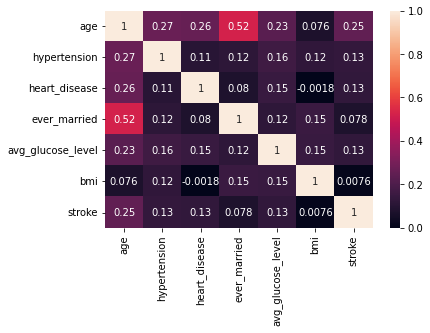

In [30]:
sns.heatmap(sp_df.corr(), annot = True)
plt.show()

#### Observing Highest Cols Correlations

We observe the highest correlation columns with the target class, and find col: age, hypertension, heart_disease, avg_glucose_level are the highest correlated cols.

We also find, ever_married and age as correlated cols/attributes that should be explored together. While bmi seem the least correlated to any other attribute and target class.

In [31]:
sp_df['stroke'].value_counts()

0    3363
1     202
Name: stroke, dtype: int64

In [32]:
sp_df['hypertension'].value_counts()

0    3119
1     446
Name: hypertension, dtype: int64

In [33]:
sp_df[['stroke','hypertension']].groupby('hypertension').agg(['sum','count']) 

stroke      
                sum count
hypertension             
0               140  3119
1                62   446

In [34]:
NoHypertension_stroke = round((140/3119),3) # individals with stroke and no hyper / all indiv who don have hyper
hypertension_stroke = round((62/446),3) # individals with stroke and hyper / all indiv who 't have hyper
print('NoHypertension_stroke_totalHyper', NoHypertension_stroke)
print('hypertension_stroke_totalHyper', hypertension_stroke)
NoHypertension_stroke_totalstroke = round((140/(140+62)),3) #perc of indivi with a stroke that don't have hyper
hypertension_stroke_totalstroke = round((62/(140+62)),3)
print('NoHypertension_stroke_totalstroke', NoHypertension_stroke_totalstroke)
print('hypertension_stroke_totalstroke', hypertension_stroke_totalstroke)

NoHypertension_stroke_totalHyper 0.045
hypertension_stroke_totalHyper 0.139
NoHypertension_stroke_totalstroke 0.693
hypertension_stroke_totalstroke 0.307


- From observing the results, we find 0.4% of the individuals who don't have hypertension have a stroke.
While 13.9% of individuals who have hypertension have a stroke.

- From observing the results, we find 69.3 % of the individuals who have a stroke do not have hyperension.
While 30.7% have hypertension.

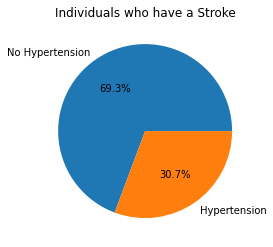

In [35]:
stroke_df = sp_df[sp_df['stroke']==1]
_labels = 'No Hypertension', 'Hypertension' # 0, 1
plt.pie(stroke_df['hypertension'].value_counts(), labels = _labels, autopct='%.1f%%')
plt.title('Individuals who have a Stroke')
plt.show()

For age:
100% of individuals who have a stroke are over 35yrs, and most of them are over 60.

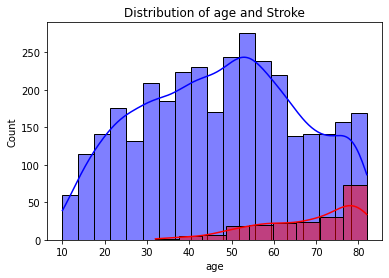

In [36]:
nostroke_df = sp_df[sp_df['stroke']==0]
stroke_df = sp_df[sp_df['stroke']==1]

sns.histplot(nostroke_df['age'], kde = True, color='blue')
sns.histplot(stroke_df['age'], kde = True, color='red').set_title("Distribution of age and Stroke")
plt.show()


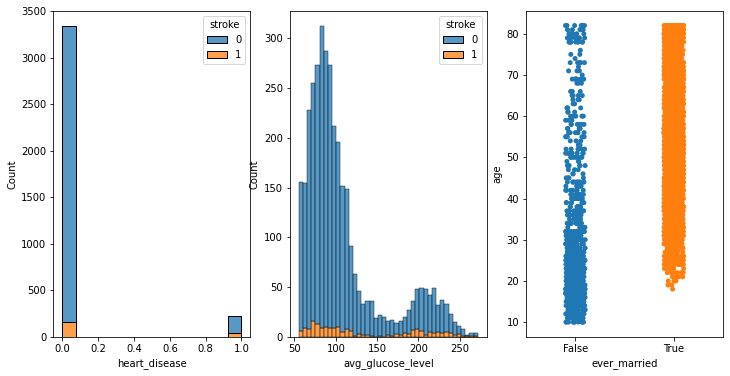

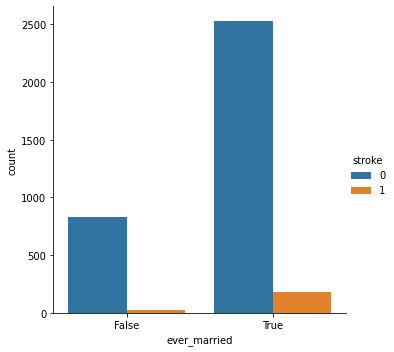

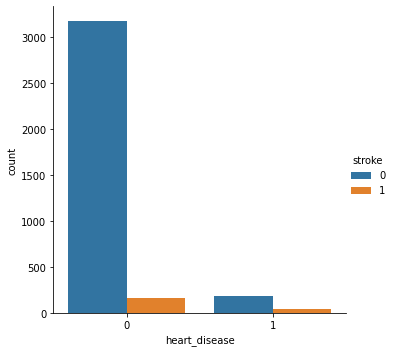

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))
sns.histplot(data=sp_df, x='heart_disease', hue='stroke', multiple='stack', ax=ax[0])
sns.histplot(data=sp_df, x='avg_glucose_level', hue='stroke', multiple='stack', ax=ax[1])
#sns.swarmplot(data=sp_df, orient="v", x='ever_married', y='stroke' , ax=ax[2])
sns.stripplot(data=sp_df, x='ever_married', y='age' , ax=ax[2])

sns.catplot(data=sp_df, x='ever_married',kind='count', hue='stroke')
sns.catplot(data=sp_df, x='heart_disease', hue='stroke', kind='count')
plt.show()

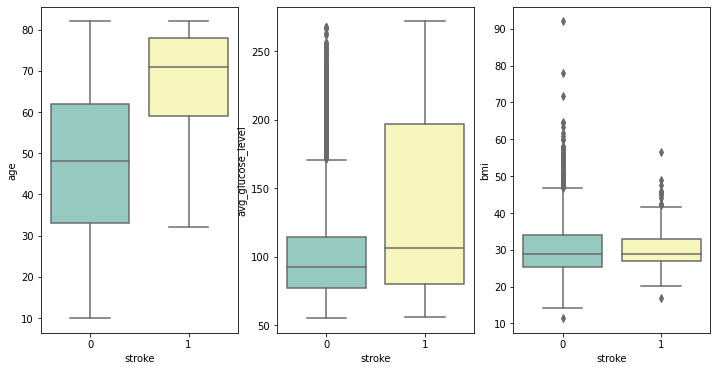

In [47]:
column_list = ['age', 'avg_glucose_level', 'bmi']
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}

fig, ax = plt.subplots(1, 3, figsize=(12,6))

sns.boxplot(data= sp_df, x='stroke', y='age', palette="Set3", ax=ax[0])
sns.boxplot(data= sp_df, x='stroke', y='avg_glucose_level', palette="Set3", ax=ax[1])
sns.boxplot(data= sp_df, x='stroke', y='bmi',palette="Set3", ax=ax[2])
#plt.title('Plotting relation between strokes and (age,AGL, bmi)')

plt.show()

By observing the plots:

- We find that individuals with no heart diseases who had a stroke are more than individuals who have a heart disease but didn't have a stroke.
While in general, individuals who don't have a heart disease, don't have a stroke.
- We find people who have a stroke are mostly married.
- And most married people are over 30.
- Individuals with avg_glucose_level over 100 mostly have a stroke.
- BMI doesn't distinguish the two target classes in the box plot.

To study these observations in depth we analyze the following

In [ ]:
sp_df[['stroke','heart_disease']].value_counts()

stroke  heart_disease
0       0                3174
        1                 189
1       0                 163
        1                  39
dtype: int64

In [ ]:
sp_df[['stroke','ever_married']].value_counts()

stroke  ever_married
0       True            2529
        False            834
1       True             181
        False             21
dtype: int64

In [ ]:
married_wstroke = (181/(181+2529))*100
notMarried_wstroke = (21/(21+834))*100
print('married_wstroke', married_wstroke)
print('notMarried_wstroke', notMarried_wstroke)

married_wstroke 6.678966789667896
notMarried_wstroke 2.456140350877193


Encoding BMI into categories to get a better view at the correlation

In [ ]:
# Encoding the ordinal variable BMI_range from underweight to severe obesity
def create_bmi_range(bmi):
    if bmi < 18.5:# underweight
        return 0  # underweight
    elif bmi < 25.0:# healthy
        return 1  # healthy
    elif bmi < 30.0:# overweight
        return 2  # overweight
    elif bmi < 40.0:# moderatly
        return 3  # moderatly
    else:# severly
        return 4  # severly

In [ ]:
sp_df['bmi_range'] = sp_df['bmi'].apply(create_bmi_range)

In [ ]:
sp_df['bmi_range'].head(10)

0     3
1     2
2     3
3     3
4     1
5     2
6     2
7     1
10    2
11    3
Name: bmi_range, dtype: int64

We can see a clearer view of the correlation between bmi and stroke.

We find that most individuals who had a stroke are overweight and moderatly obese.

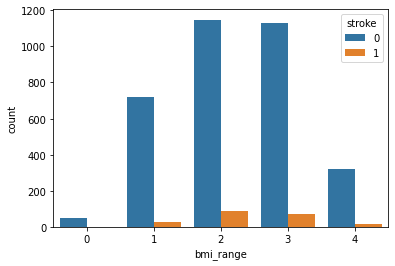

In [ ]:
sns.countplot(data=sp_df, x='bmi_range', hue='stroke')

#### Residence_type and smoking_status

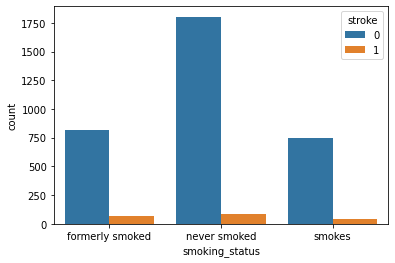

In [ ]:
sns.countplot(data=sp_df, x='smoking_status', hue='stroke')

In [ ]:
sp_df[['stroke','smoking_status']].groupby('smoking_status').agg(['sum','count']) 

stroke      
                   sum count
smoking_status              
formerly smoked     70   884
never smoked        90  1892
smokes              42   789

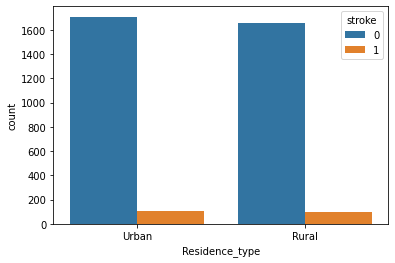

In [ ]:
sns.countplot(data=sp_df, x='Residence_type', hue='stroke')

In [ ]:
sp_df[['stroke','Residence_type']].groupby('Residence_type').agg(['sum','count']) 

stroke      
                  sum count
Residence_type             
Rural              96  1751
Urban             106  1814

We don't observe any distinguished categories for Residence Type and Smoking Status.

### Gender

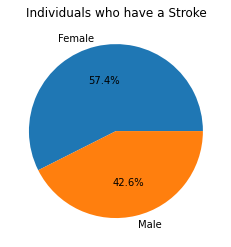

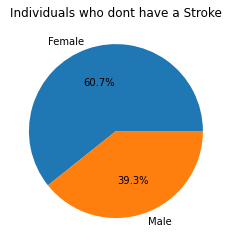

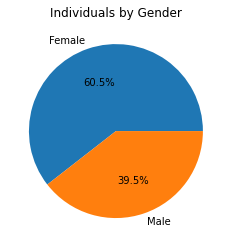

In [ ]:
stroke_df = sp_df[sp_df['stroke']==1]
NOstroke_df = sp_df[sp_df['stroke']==0]
_labels = 'Female', 'Male' # 0, 1
plt.pie(stroke_df['gender'].value_counts(), labels = _labels, autopct='%.1f%%')
plt.title('Individuals who have a Stroke')
plt.show()
plt.pie(NOstroke_df['gender'].value_counts(), labels = _labels, autopct='%.1f%%')
plt.title('Individuals who don''t have a Stroke')
plt.show()
plt.pie(sp_df['gender'].value_counts(), labels = _labels, autopct='%.1f%%')
plt.title('Individuals by Gender')
plt.show()

# Conclusion

♦ The data is imbalanced and most of the cols/attributes aren't distributed normally, mostly skewed.

♦ We found that most stroke cases are found in individuals that have neither Heart Diseases nor Hypertension.

♦ We found that individuals with strokes have mostly Overweight or moderetly obese BMI.

♦ We found that individuals with strokes are mostly older individuals over 60.

♦ We found individuals who have a stroke are mostly married; and most married people are over 30.

♦ Individuals with avg_glucose_level over 100 mostly have a stroke.

Gender and a couple of other attributes have no effect/correlation to having a stroke.